# EDA validation dev

### imports libs

In [1]:
import pandas as pd
import sys
sys.path.append('../')
from python_modules.eda_charts import dual_line_barplot, sub_hist_boxplot, tabular_plot, distribution_by_group, plot_distributions, descriptive_dataframe, dual_line_bar_boxplot
 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

The data set is used is available at [heart attack](https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset). <br>

Age : Age of the patient <br>
Sex : Sex of the patient<br>
exang: exercise induced angina (1 = yes; 0 = no)<br>
ca: number of major vessels (0-3)<br>
cp : Chest Pain type chest pain type<br>
   - Value 0: typical angina<br>
   - Value 1: atypical angina<br>
   - Value 2: non-anginal pain<br>
   - Value 3: asymptomatic<br>
   
trtbps : resting blood pressure (in mm Hg)<br>
chol : cholestoral in mg/dl fetched via BMI sensor<br>
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>

rest_ecg : resting electrocardiographic results\
   - Value 0: normal<br>
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria<br>
thalach: maximum heart rate achieved<br>

target: 0 = less chance of heart attack 1 = more chance of heart attack<br>

## load data

In [2]:
df = pd.read_csv('https://filedn.com/lK8J7mCaIwsQFcheqaDLG5z/data/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
cp_mapping = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
}

df['cp'] = df['cp'].map(cp_mapping)

In [5]:
descriptive_dataframe(df)

,Dtype,Count,NaN Count,Unique,Top,Freq,mean,std,min,5%,25%,50%,75%,95%,max,Range,Kurtosis,Skew
age,int64,303,0,41,NaN,NaN,54.366,9.082,29.0,39.1,47.5,55.0,61.0,68.0,77.0,48.0,-0.542,-0.202
sex,int64,303,0,2,NaN,NaN,0.683,0.466,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,-1.383,-0.791
cp,object,303,0,4,typical angina,143.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trestbps,int64,303,0,49,NaN,NaN,131.624,17.538,94.0,108.0,120.0,130.0,140.0,160.0,200.0,106.0,0.929,0.714
chol,int64,303,0,152,NaN,NaN,246.264,51.831,126.0,175.0,211.0,240.0,274.5,326.9,564.0,438.0,4.505,1.143
fbs,int64,303,0,2,NaN,NaN,0.149,0.356,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.960,1.987
restecg,int64,303,0,3,NaN,NaN,0.528,0.526,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,-1.363,0.163
thalach,int64,303,0,91,NaN,NaN,149.647,22.905,71.0,108.1,133.5,153.0,166.0,181.9,202.0,131.0,-0.062,-0.537
exang,int64,303,0,2,NaN,NaN,0.327,0.470,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,-1.458,0.743
oldpeak,float64,303,0,40,NaN,NaN,1.040,1.161,0.0,0.0,0.0,0.8,1.6,3.4,6.2,6.2,1.576,1.270


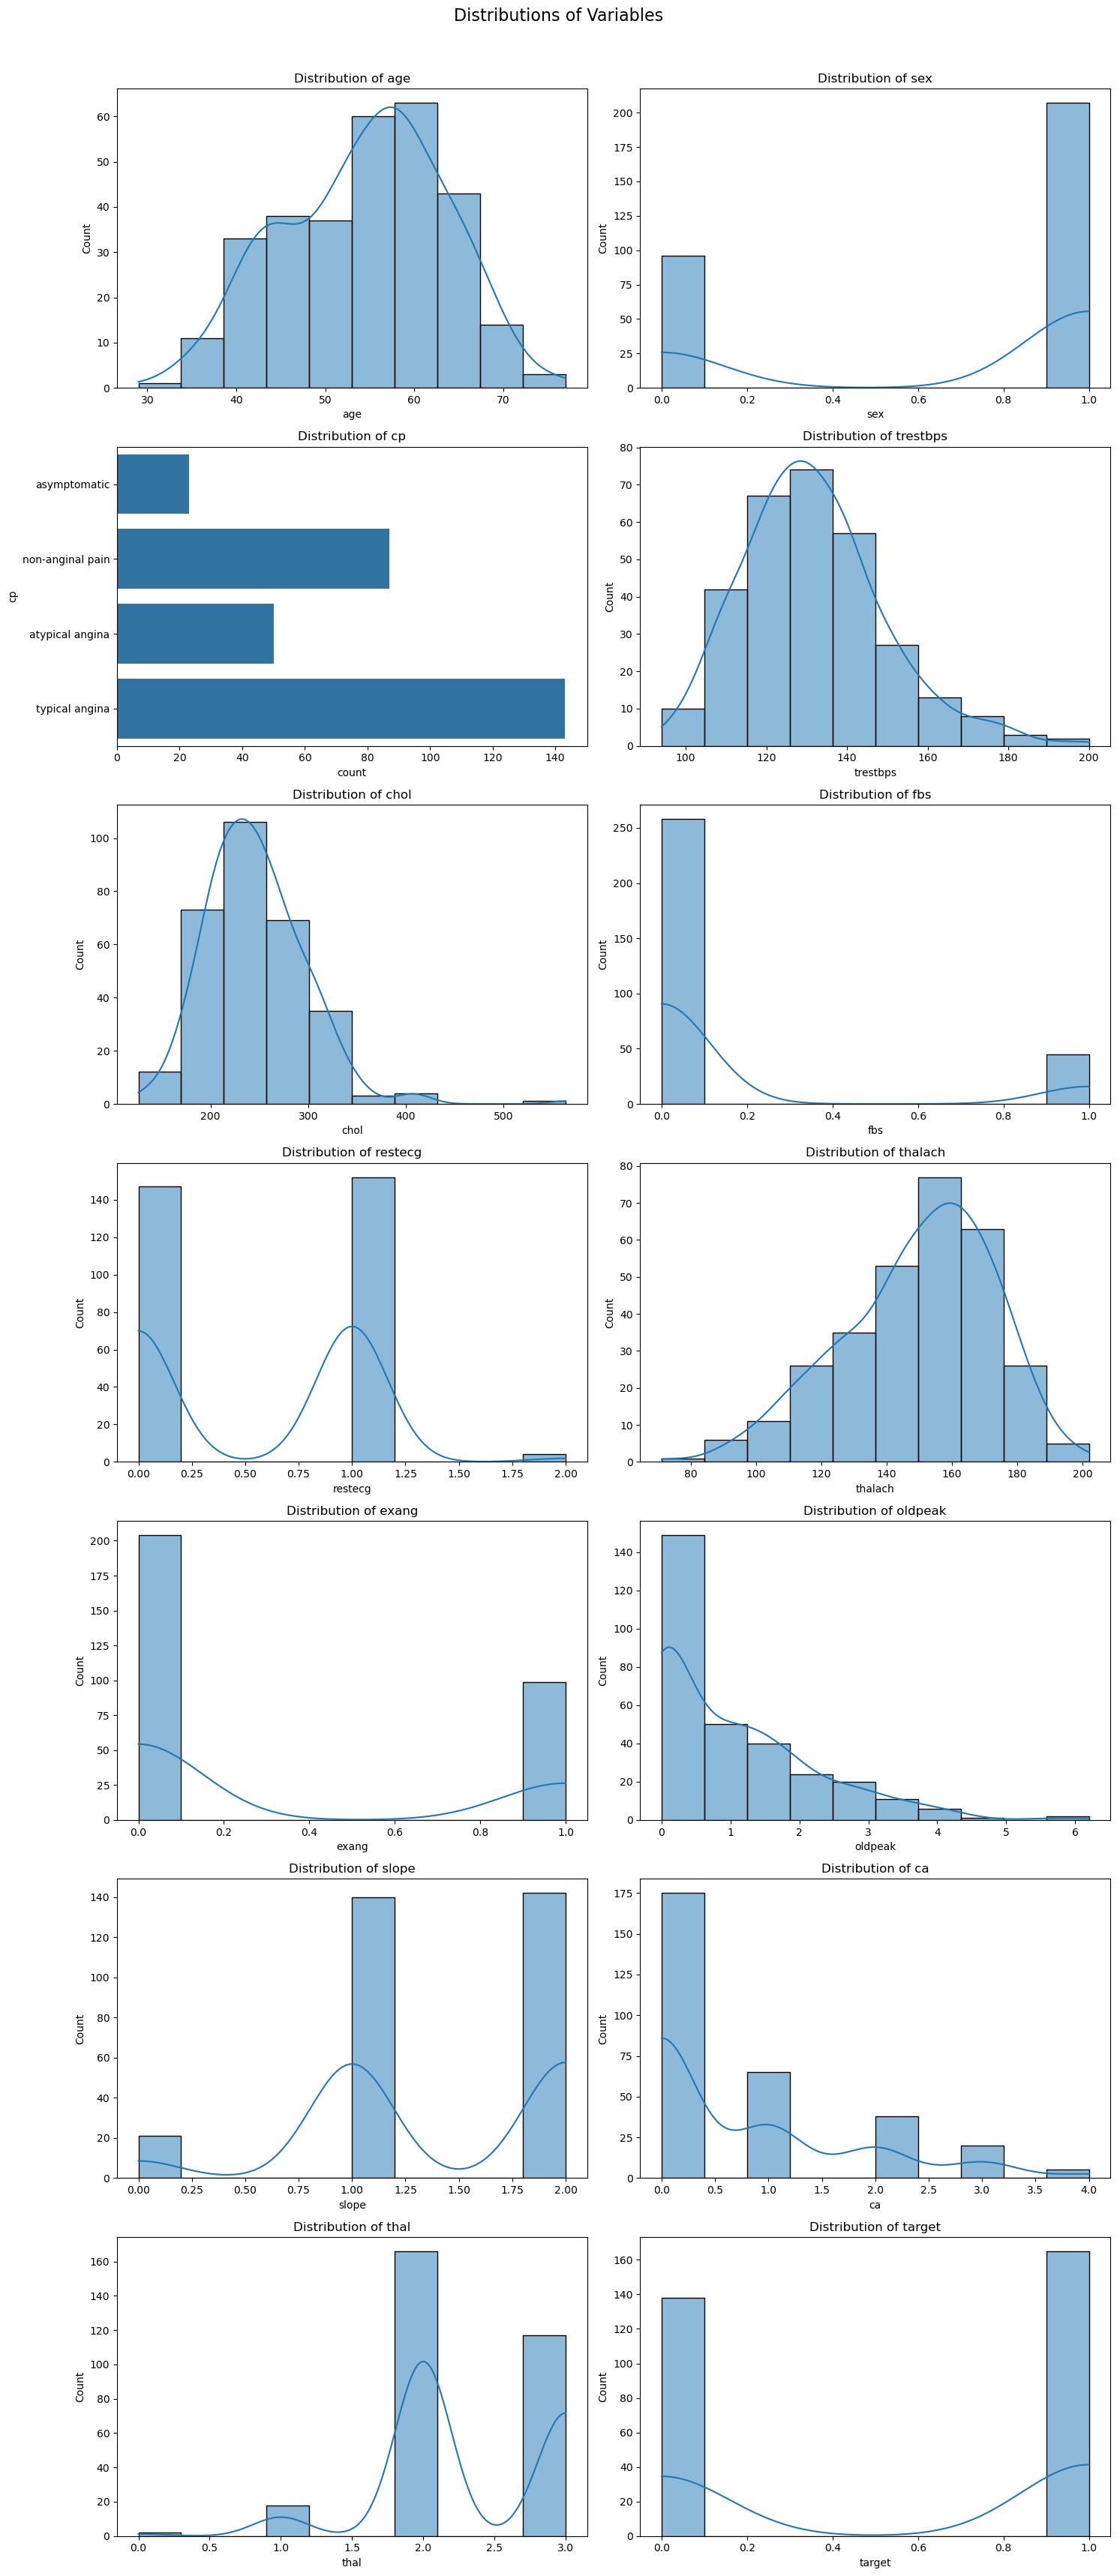

In [6]:
plot_distributions(df)

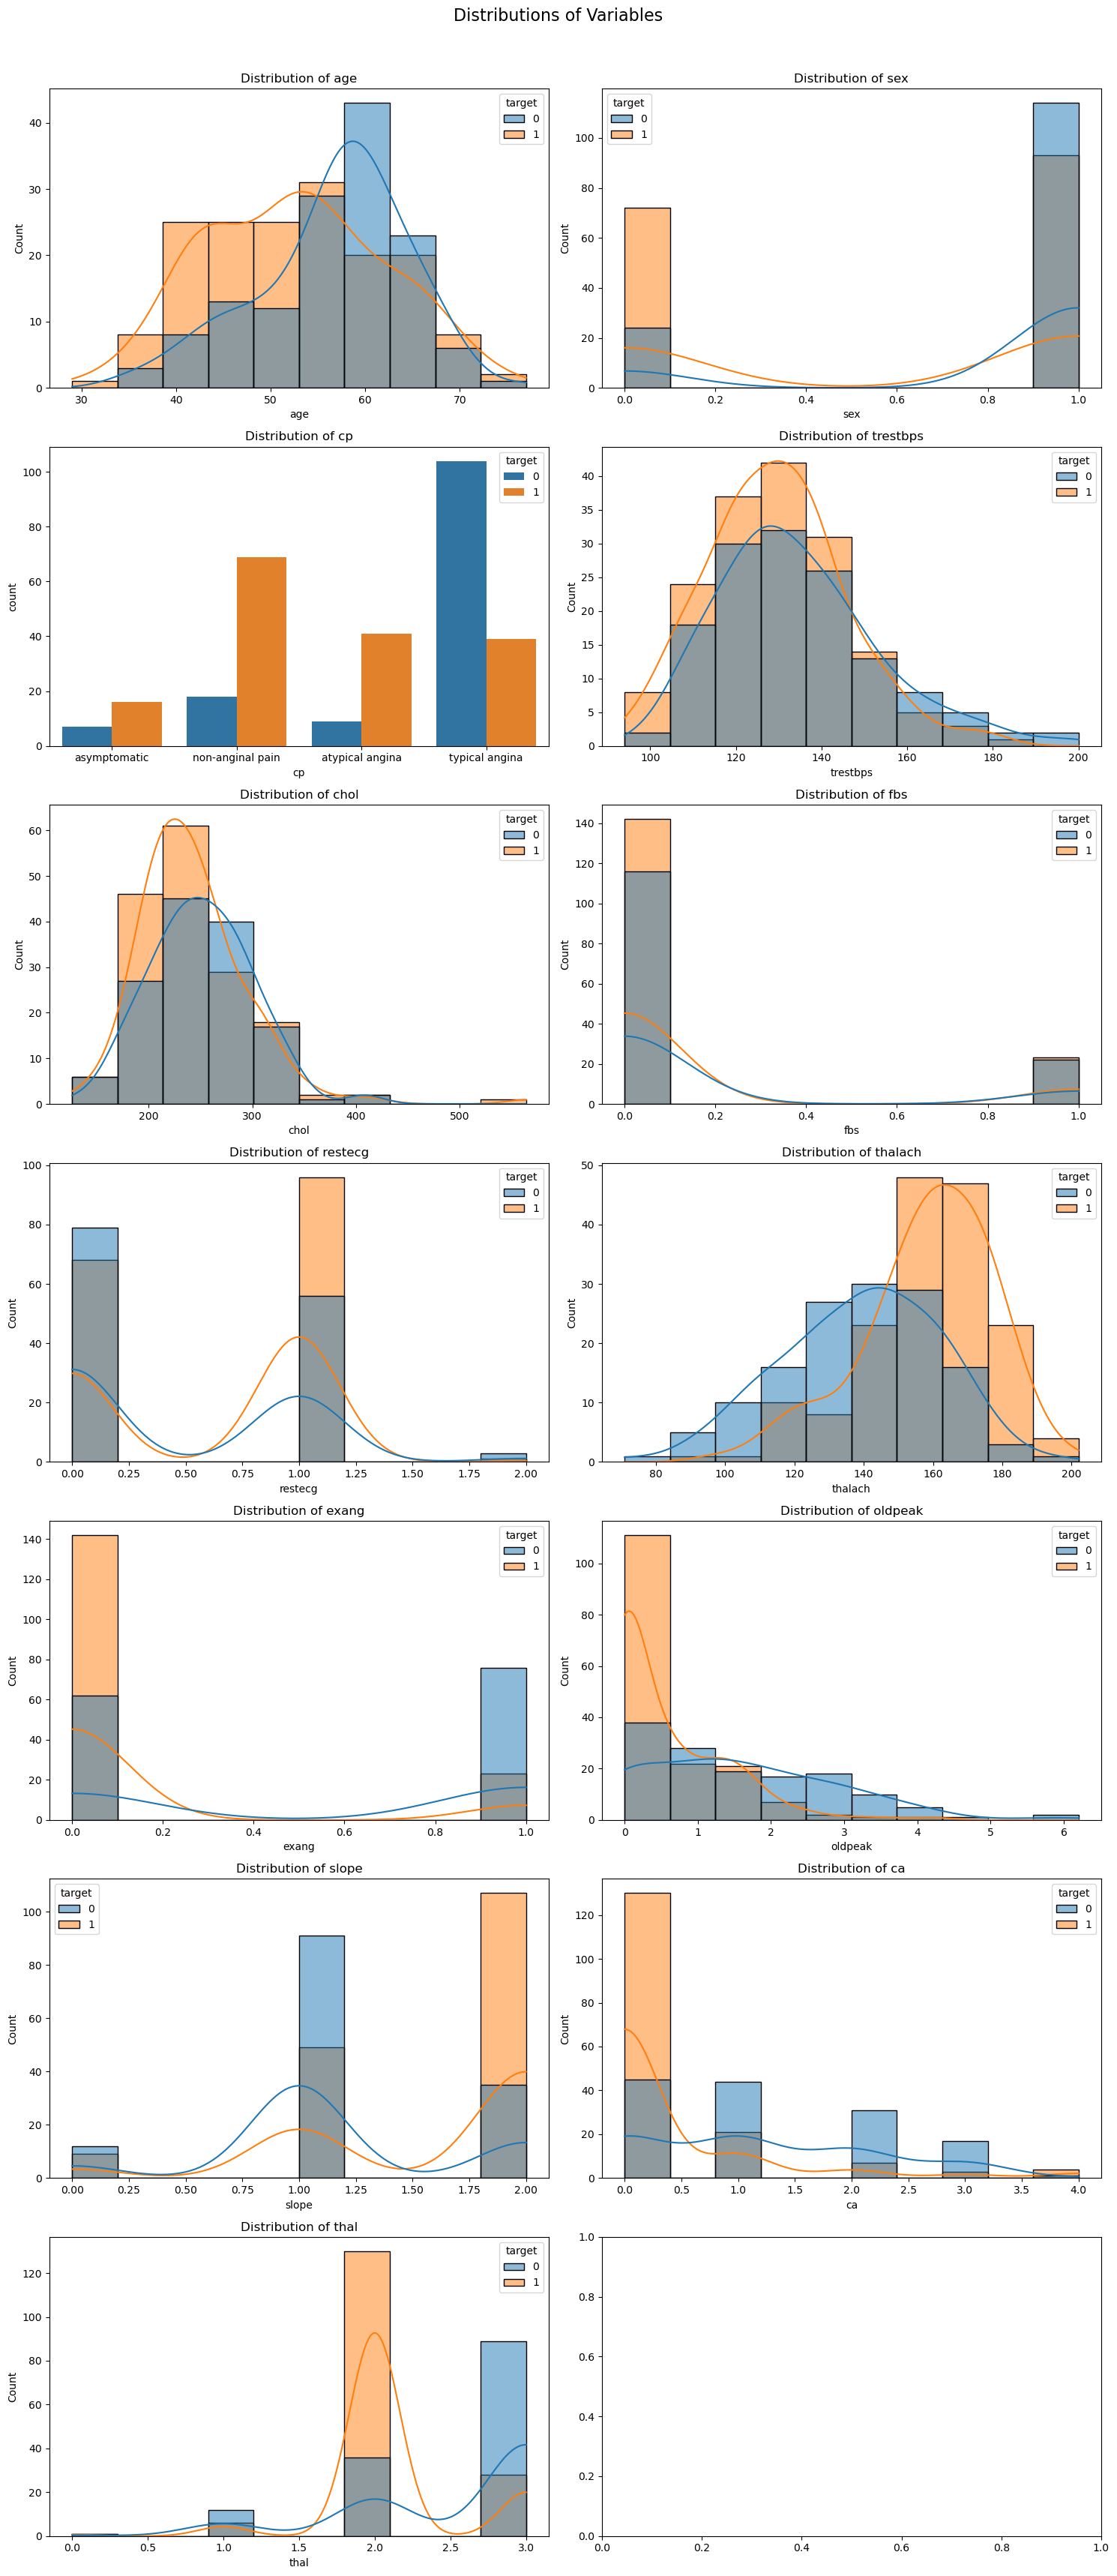

In [7]:
plot_distributions(df, by='target')

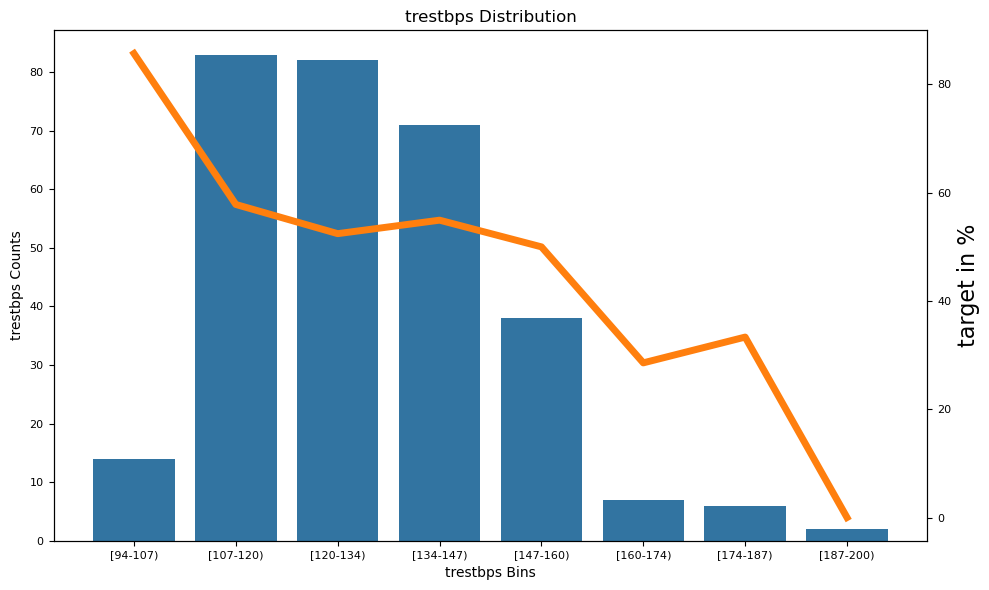

In [8]:
dual_line_barplot(df, target_var='target', feature_var='trestbps', bins=8, round_bins=0)        

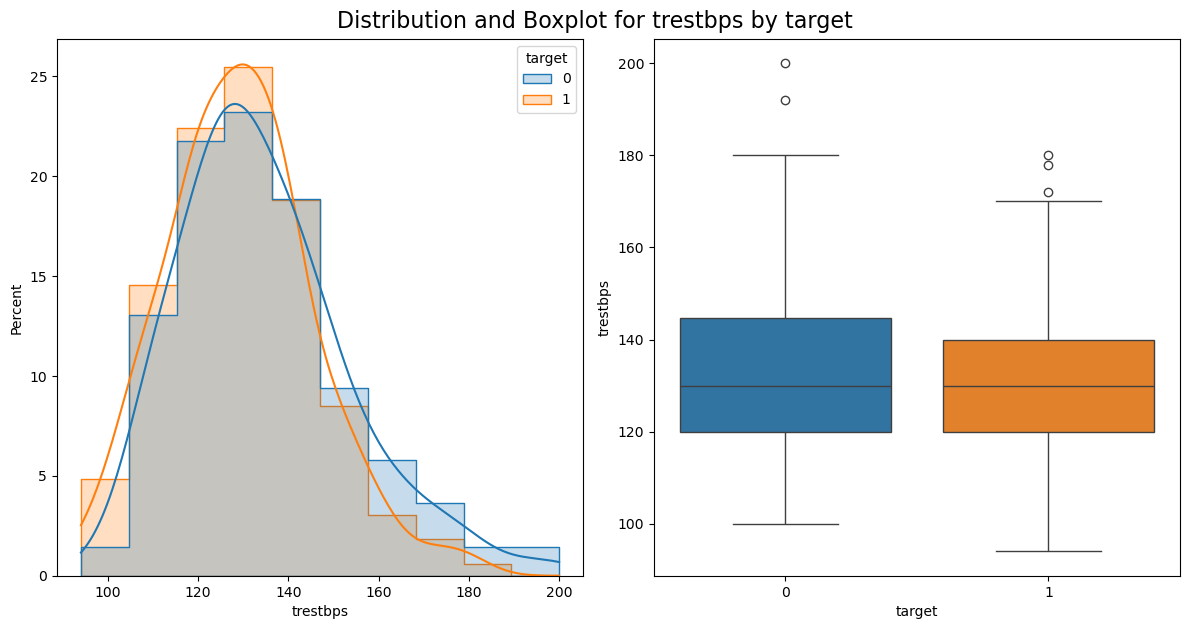

In [9]:
sub_hist_boxplot(df, target_var='target', feature_var='trestbps', stat = "percent")

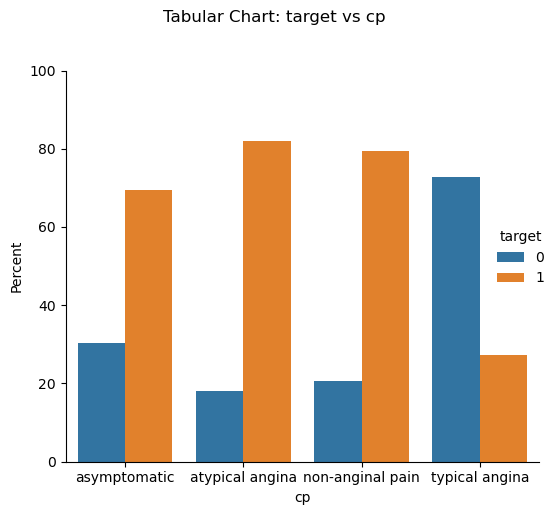

In [10]:
tabular_plot(df, target_var='target', feature_var='cp' )

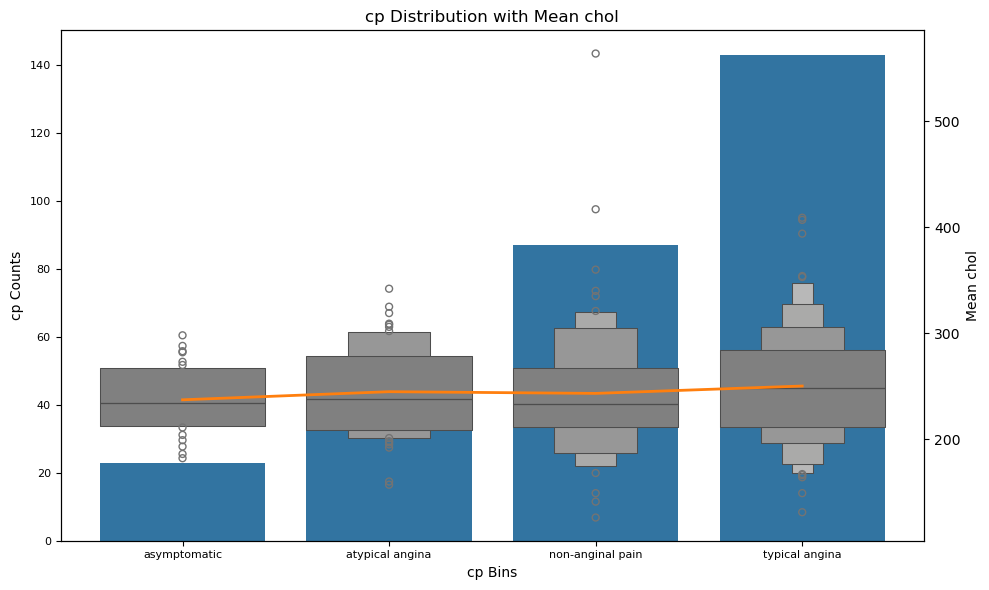

In [11]:
dual_line_bar_boxplot(df, target_var = "chol" , feature_var='cp' , chart="boxenplot")

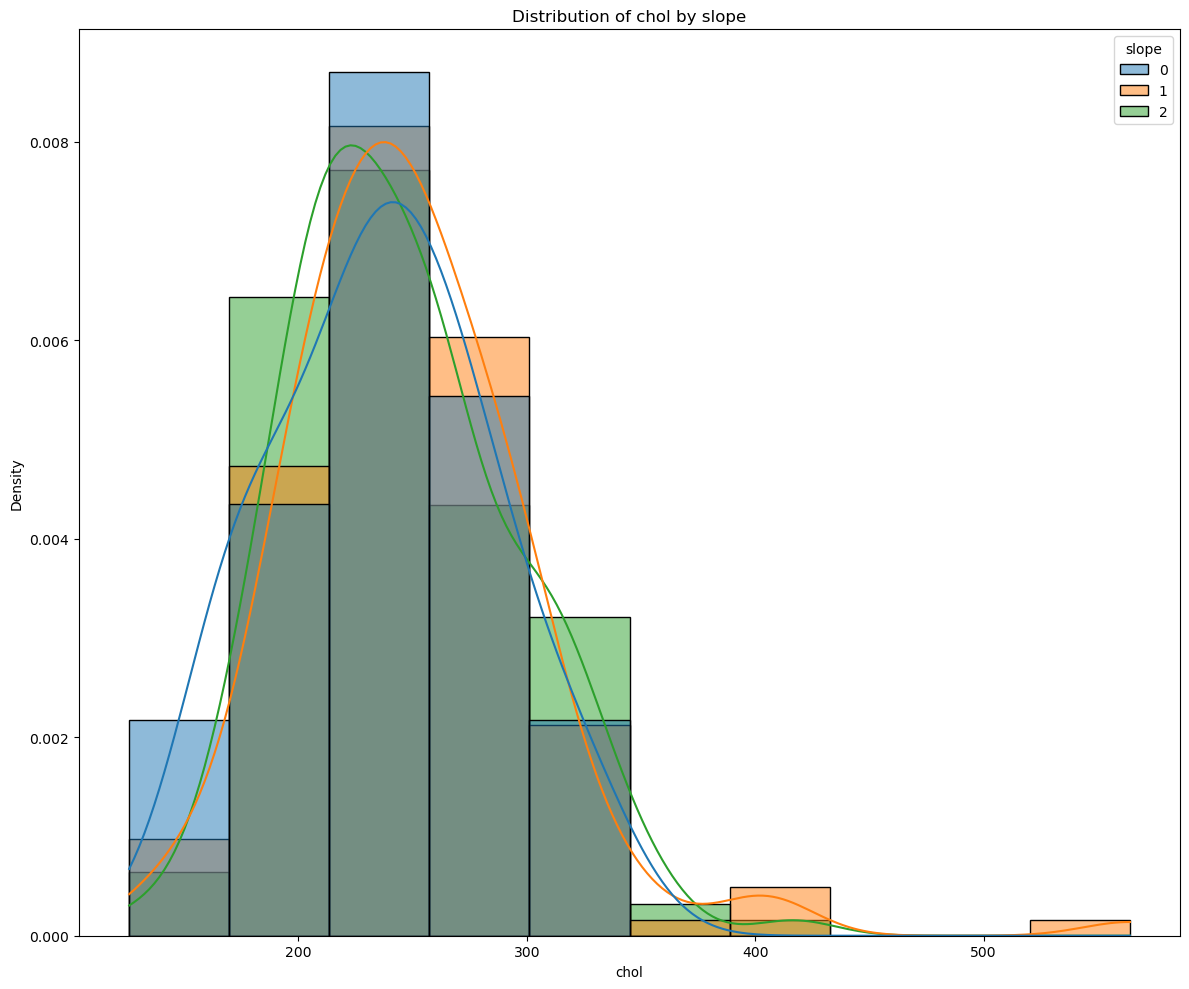

In [12]:
distribution_by_group(df, "chol", by = "slope")